In [1]:
import numpy as np

# import qiskit libs
from qiskit import IBMQ, QuantumCircuit, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.providers.ibmq import least_busy
from qiskit.tools.jupyter import *

API_KEY = 'c6f6569ab6b6f9ec1a437d4d1187b7c7ea2ac4bd91679613e204e7bb9728efd9639af14a86f840cbb05e60b6a249e532e3168c7dbff07edc4c37de9c4bb3e0b3'
try:
    provider = IBMQ.enable_account(API_KEY)
except Exception as e:
    print(e)

# qiskit plot tool
from qiskit.visualization import plot_histogram

In [12]:
def phase_oracle(n, indices_to_mark, name="Oracle"):
    qc = QuantumCircuit(n, name=name)
    oracle_matrix = np.identity(2**n)
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1
    qc.unitary(Operator(oracle_matrix), range(n))
    return qc

def diffuser(n):
    qc = QuantumCircuit(n, name="Diffuser (V)")
    qc.h(range(n))
    qc.append(phase_oracle(n, [0]), range(n))
    qc.h(range(n))
    return qc

def grover(n, marked):
    qc = QuantumCircuit(n, n)
    r = int(np.round(np.pi / (4 * np.arcsin(np.sqrt(len(marked) / 2**n))) - 1/2))
    print(f'{n} qubits, basis state {marked} marked, {r} rounds')
    qc.h(range(n))
    for _ in range(r):
        qc.append(phase_oracle(n, marked), range(n))
        qc.append(diffuser(n), range(n))
    qc.measure(range(n), range(n))
    return qc

In [13]:
n = 5
x = np.random.randint(2**n)
marked = [x]
qc = grover(n, marked)
qc.draw()

5 qubits, basis state [29] marked, 4 rounds


┌───┐┌─────────┐┌───────────────┐┌─────────┐┌───────────────┐┌─────────┐»
q_0: ┤ H ├┤0        ├┤0              ├┤0        ├┤0              ├┤0        ├»
     ├───┤│         ││               ││         ││               ││         │»
q_1: ┤ H ├┤1        ├┤1              ├┤1        ├┤1              ├┤1        ├»
     ├───┤│         ││               ││         ││               ││         │»
q_2: ┤ H ├┤2 Oracle ├┤2 Diffuser (V) ├┤2 Oracle ├┤2 Diffuser (V) ├┤2 Oracle ├»
     ├───┤│         ││               ││         ││               ││         │»
q_3: ┤ H ├┤3        ├┤3              ├┤3        ├┤3              ├┤3        ├»
     ├───┤│         ││               ││         ││               ││         │»
q_4: ┤ H ├┤4        ├┤4              ├┤4        ├┤4              ├┤4        ├»
     └───┘└─────────┘└───────────────┘└─────────┘└───────────────┘└─────────┘»
c_0: ════════════════════════════════════════════════════════════════════════»
                                                                             »
c_1: ════════════════════════════════════════════════════════════════════════»
                                                                             »
c_2: ════════════════════════════════════════════════════════════════════════»
                                                                             »
c_3: ════════════════════════════════════════════════════════════════════════»
                                                                             »
c_4: ════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌───────────────┐┌─────────┐┌───────────────┐┌─┐            
«q_0: ┤0              ├┤0        ├┤0              ├┤M├────────────
«     │               ││         ││               │└╥┘┌─┐         
«q_1: ┤1              ├┤1        ├┤1              ├─╫─┤M├─────────
«     │               ││         ││               │ ║ └╥┘┌─┐      
«q_2: ┤2 Diffuser (V) ├┤2 Oracle ├┤2 Diffuser (V) ├─╫──╫─┤M├──────
«     │               ││         ││               │ ║  ║ └╥┘┌─┐   
«q_3: ┤3              ├┤3        ├┤3              ├─╫──╫──╫─┤M├───
«     │               ││         ││               │ ║  ║  ║ └╥┘┌─┐
«q_4: ┤4              ├┤4        ├┤4              ├─╫──╫──╫──╫─┤M├
«     └───────────────┘└─────────┘└───────────────┘ ║  ║  ║  ║ └╥┘
«c_0: ══════════════════════════════════════════════╩══╬══╬══╬══╬═
«                                                      ║  ║  ║  ║ 
«c_1: ═════════════════════════════════════════════════╩══╬══╬══╬═
«                                                         ║  ║  ║ 
«c_2: ════════════════════════════════════════════════════╩══╬══╬═
«                                                            ║  ║ 
«c_3: ═══════════════════════════════════════════════════════╩══╬═
«                                                               ║ 
«c_4: ══════════════════════════════════════════════════════════╩═
«

{'00001': 1, '00110': 1, '00010': 1, '01001': 1, '11101': 9994, '01011': 1, '01100': 1}
3.919534679768385


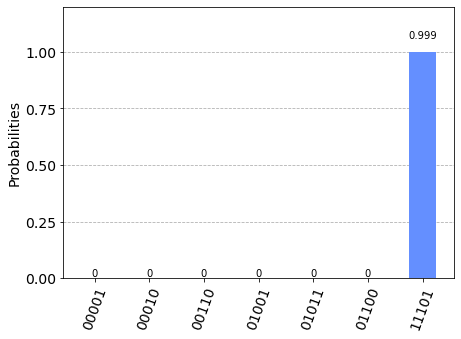

In [14]:
# using local simulator
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots=10_000).result()
counts = results.get_counts(qc)

print(counts)
print(np.pi / (4 * np.arcsin(np.sqrt(len(marked) / 2**n))) - 1/2)

plot_histogram(counts)

In [16]:
x, bin(x)

(29, '0b11101')